In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
adata_neg , adata_pos = read_chlamydomonas_files(n_obs=2500)



gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was f

gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was f

gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was filtered out
gene was f

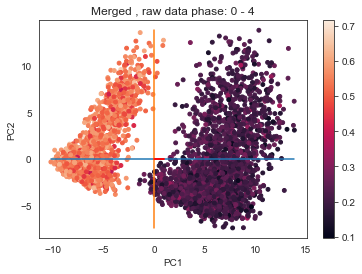

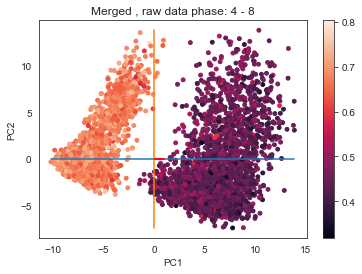

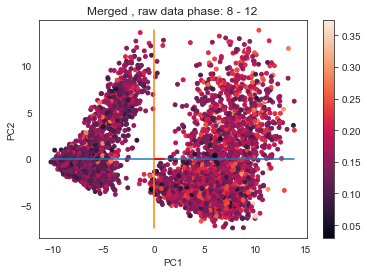

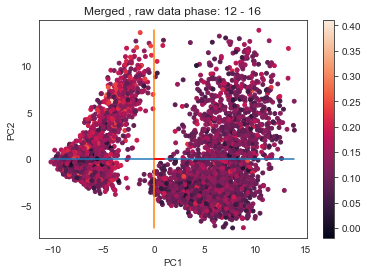

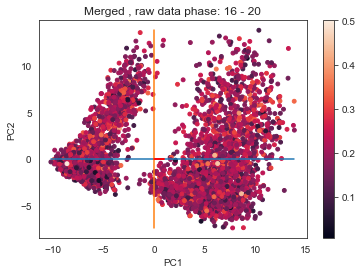

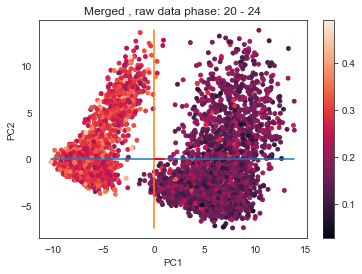

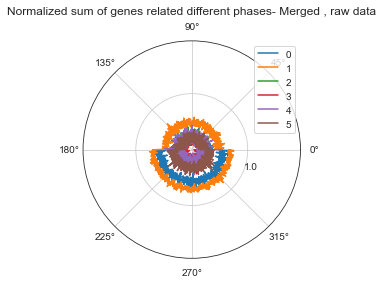

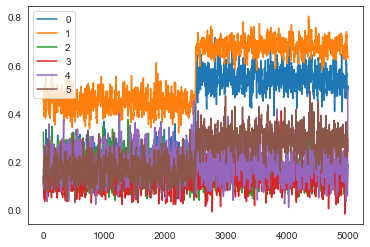

silhoutte score before : 0.087794
davies_bouldin_score: 3.1248271027198538
calinski_harabasz_score: 498.5729376098446


In [2]:
sc.pp.filter_cells(adata_neg, min_genes=100)
sc.pp.filter_cells(adata_pos, min_genes=100)
sc.pp.normalize_per_cell(adata_neg, counts_per_cell_after=1e4)
sc.pp.log1p(adata_neg)
sc.pp.normalize_per_cell(adata_pos, counts_per_cell_after=1e4)
sc.pp.log1p(adata_pos)

adata_unit = adata_neg.concatenate(adata_pos)
bdata_unit = copy.deepcopy(adata_unit.copy())
filter_result = sc.pp.filter_genes_dispersion(
        bdata_unit.X,  n_top_genes=7000, log=False
    )
adata_unit._inplace_subset_var(filter_result.gene_subset)
adata_neg._inplace_subset_var(filter_result.gene_subset)  # filter genes
adata_pos._inplace_subset_var(filter_result.gene_subset)  # filter genes
bdata_unit._inplace_subset_var(filter_result.gene_subset)
plot_diurnal_cycle_by_phase(bdata_unit, title="Merged , raw data")
labels = adata_unit.obs["FE"]
print("silhoutte score before : " +str(silhouette_score(adata_unit.X,labels)))
print("davies_bouldin_score: "+str(davies_bouldin_score(adata_unit.X,labels)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(adata_unit.X,labels)))


In [ ]:
E_pos , E_rec_pos = reconstruction_cyclic(adata_pos.X, iterNum=100,batch_size=5000 ) # 25,4000,0.1
E_neg , E_rec_neg = reconstruction_cyclic(adata_neg.X, iterNum=100,batch_size=5000 ) # 25,4000,0.1
order_list_pos = E_to_range(E_rec_pos)
adata_pos = adata_pos[order_list_pos,:]
order_list_neg = E_to_range(E_rec_neg)
adata_neg = adata_neg[order_list_neg,:]
adata_neg.write(filename="adata_neg_reordered.h5ad")
adata_pos.write(filename="adata_pos_reordered.h5ad")
bdata_pos = copy.deepcopy(adata_pos.copy())
bdata_neg = copy.deepcopy(adata_neg.copy())

cdata_pos = copy.deepcopy(adata_pos.copy())
cdata_neg = copy.deepcopy(adata_neg.copy())

plot_diurnal_cycle_by_phase(adata_pos, title="Ordered , FE+ ")
plot_diurnal_cycle_by_phase(adata_neg, title="Ordered , FE- ")


Iteration number: 0 function value= 3.9459830513270135e-21
Iteration number: 25 function value= 8679.680369771278


In [ ]:
bdata_pos = copy.deepcopy(adata_pos.copy())
bdata_neg = copy.deepcopy(adata_neg.copy())


In [ ]:
D_neg = filter_non_cyclic_genes_line(bdata_neg.X, regu=0.1,iterNum=20)
D_pos = filter_non_cyclic_genes_line(bdata_pos.X, regu=0.1,iterNum=20)
bdata_neg.X = bdata_neg.X.dot(D_neg)
bdata_neg.X = bdata_pos.X.dot(D_pos)

In [ ]:
F_en_neg =enhancement_cyclic(bdata_neg.X, regu=0.01 ,iterNum=100)
F_en_pos =enhancement_cyclic(bdata_pos.X, regu=0.01 ,iterNum=100)
bdata_neg.X = bdata_neg.X * F_en_neg
bdata_pos.X = bdata_pos.X * F_en_pos

plot_diurnal_cycle_by_phase(bdata_pos, title="Enhanced , FE+ ")
plot_diurnal_cycle_by_phase(bdata_neg, title="Enhanced , FE- ")


In [ ]:

F_neg =filtering_cyclic(adata_neg.X, regu=0 ,iterNum=250)
F_pos =filtering_cyclic(adata_pos.X, regu=0 ,iterNum=250)

cdata_neg.X = cdata_neg.X * F_neg
cdata_pos.X = cdata_pos.X * F_pos

plot_diurnal_cycle_by_phase(cdata_pos, title="Filtered , FE+ ")
plot_diurnal_cycle_by_phase(cdata_neg, title="Filtered , FE- ")
